In [1]:
from sympy import *

# ket-side transition constants and equation

In [2]:
# symbols

rabi_ag = Symbol('Omega_alpha_gamma')
rho_ab0 = Symbol('rho^0_alpha_beta')
rho_gb0 = Symbol('rho^0_gamma_beta')
k_lasers = Symbol('k_lasers')
k = Symbol('k')
z = Symbol('z')
omega_lasers = Symbol('omega_lasers')
omega = Symbol('omega')
omega_gb = Symbol('omega_gamma_beta')
t = Symbol('t')
gamma_gb = Symbol('Gamma_gamma_beta')
rho_gb = Symbol('rho_gamma_beta')
rho_gb


rho_gamma_beta

In [3]:
Eq(rho_gb, (rabi_ag*rho_ab0/2)*
   ((exp(I*((k_lasers + k)*z - (omega_lasers + omega)*t))/(omega_gb - (omega_lasers+omega) - I*gamma_gb))+
   (exp(I*((k_lasers - k)*z - (omega_lasers - omega)*t))/(omega_gb - (omega_lasers-omega) - I*gamma_gb))+
  exp(-gamma_gb*t)*exp(-I*omega_gb*t)*
  (-exp(I*(k_lasers + k)*z)/(omega_gb - (omega_lasers + omega) - I*gamma_gb)+
  (-exp(I*(k_lasers - k)*z)/(omega_gb - (omega_lasers - omega) - I*gamma_gb))))+
   rho_gb0*exp(-gamma_gb*t)*exp(-I*omega_gb*t))

Eq(rho_gamma_beta, Omega_alpha_gamma*rho^0_alpha_beta*((-exp(I*z*(-k + k_lasers))/(-I*Gamma_gamma_beta + omega + omega_gamma_beta - omega_lasers) - exp(I*z*(k + k_lasers))/(-I*Gamma_gamma_beta - omega + omega_gamma_beta - omega_lasers))*exp(-Gamma_gamma_beta*t)*exp(-I*omega_gamma_beta*t) + exp(I*(-t*(-omega + omega_lasers) + z*(-k + k_lasers)))/(-I*Gamma_gamma_beta + omega + omega_gamma_beta - omega_lasers) + exp(I*(-t*(omega + omega_lasers) + z*(k + k_lasers)))/(-I*Gamma_gamma_beta - omega + omega_gamma_beta - omega_lasers))/2 + rho^0_gamma_beta*exp(-Gamma_gamma_beta*t)*exp(-I*omega_gamma_beta*t))

# bra-side transition constants and equations

In [4]:
# symbols

rabi_bg = Symbol('Omega_beta_gamma')
rho_ag0 = Symbol('rho^0_alpha_gamma')
rho_ab0 = Symbol('rho^0_alpha_beta')
k_lasers = Symbol('k_lasers')
k = Symbol('k')
z = Symbol('z')
omega_lasers = Symbol('omega_lasers')
omega = Symbol('omega')
omega_ga = Symbol('omega_gamma_alpha')
t = Symbol('t')
gamma_gb = Symbol('Gamma_gamma_beta')
gamma_ga = Symbol('Gamma_gamma_alpha')
rho_ag = Symbol('rho_alpha_gamma')
rho_ag


rho_alpha_gamma

In [8]:
bra_trans = Eq(rho_ag, (rabi_bg*rho_ab0/2)*
   ((exp(I*((k_lasers + k)*z - (omega_lasers + omega)*t))/(omega_ga + (omega_lasers+omega) + I*gamma_gb))+
   (exp(I*((k_lasers - k)*z - (omega_lasers - omega)*t))/(omega_gb + (omega_lasers-omega) + I*gamma_gb)))+
  (rabi_bg*rho_ab0/2)*(exp(-gamma_ga*t)*exp(I*omega_ga*t)*
  (-exp(I*(k_lasers + k)*z)/(omega_ga + (omega_lasers + omega) + I*gamma_ga)+
  (-exp(I*(k_lasers - k)*z)/(omega_ga + (omega_lasers - omega) + I*gamma_gb))))+
   rho_ag0*exp(-gamma_ga*t)*exp(I*omega_ga*t))
bra_func = bra_trans.args[1]
bra_func

Omega_beta_gamma*rho^0_alpha_beta*(-exp(I*z*(-k + k_lasers))/(I*Gamma_gamma_beta - omega + omega_gamma_alpha + omega_lasers) - exp(I*z*(k + k_lasers))/(I*Gamma_gamma_alpha + omega + omega_gamma_alpha + omega_lasers))*exp(-Gamma_gamma_alpha*t)*exp(I*omega_gamma_alpha*t)/2 + Omega_beta_gamma*rho^0_alpha_beta*(exp(I*(-t*(omega + omega_lasers) + z*(k + k_lasers)))/(I*Gamma_gamma_beta + omega + omega_gamma_alpha + omega_lasers) + exp(I*(-t*(-omega + omega_lasers) + z*(-k + k_lasers)))/(I*Gamma_gamma_beta - omega + omega_gamma_beta + omega_lasers))/2 + rho^0_alpha_gamma*exp(-Gamma_gamma_alpha*t)*exp(I*omega_gamma_alpha*t)

In [48]:
fid = bra_func.args[0]
driven =  bra_func.args[2]
ss = bra_func.args[1]
driven

Omega_beta_gamma*rho^0_alpha_beta*(-exp(I*z*(-k + k_lasers))/(I*Gamma_gamma_beta - omega + omega_gamma_alpha + omega_lasers) - exp(I*z*(k + k_lasers))/(I*Gamma_gamma_alpha + omega + omega_gamma_alpha + omega_lasers))*exp(-Gamma_gamma_alpha*t)*exp(I*omega_gamma_alpha*t)/2

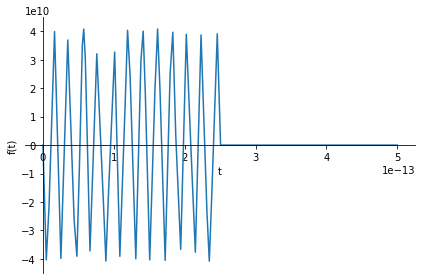

In [72]:
c = 2.998e8 #m/s

t0 = 0.0001e-15
t1 = 250e-15
pulse1 = lambda t: Heaviside(t-t0) - Heaviside(t-t1)

omega_trans = 1600*c*100*2*pi
gamma_gaval = 2.5
gamma_gbval = 1
Rabi1 = 2.045e11

driven_test = driven.subs(k,0).subs(k_lasers,0).subs(omega_lasers,0).subs(rho_ab0,1).subs(rabi_bg,Rabi1)
driven_test = driven_test.subs(gamma_ga,gamma_gaval).subs(gamma_gb,gamma_gaval)
driven_test = driven_test.subs(omega_ga, omega_trans).subs(omega, 1600*c*100*2*pi)

fid_test = fid.subs(rho_ag0,1).subs(gamma_ga,gamma_gaval)
fid_test = fid_test.subs(omega_ga, omega_trans).subs(omega, 1600*c*100*2*pi)
driven_test
plot(re(driven_test)*pulse1(t), (t,t0,500e-15))


